# Install kaggle-environments

In [ ]:
# 1. Enable Internet in the Kernel (Settings side pane)

# 2. Curl cache may need purged if v0.1.6 cannot be found (uncomment if needed). 
# !curl -X PURGE https://pypi.org/simple/kaggle-environments

# Halite environment was defined in v0.2.1
# !pip install kaggle-environments>=0.2.1

# Create Halite Environment

In [48]:
from kaggle_environments import evaluate, make

env = make("halite", debug=True)
env.render(mode="ipython", width=800, height=600)

# Create a Submission (agent)

To submit to the competition, a python file must be created where the last function is the "act" (the function which given an observation generates an action).  Logic above the "act" function is allowed including helpers.  Any python that executes immediately will be run during the initialize phase and not included in the "act timeout".

When your agent is being evaluated against others, it will not have access to the Kaggle docker image. Only the following can be imported: Python Standard Library Modules, gym, numpy, scipy, pytorch (1.3.1, cpu only), and more may be added later.

# Test your Agent

In [53]:
# agent file to test:
agent_file = "/kaggle/working/base.py"
agent_file = "base.py"
opp_file = "old_base.py"

# Play against yourself without an ERROR or INVALID.
# Note: The first episode in the competition will run this to weed out erroneous agents.
#env.run([agent_file, agent_file])
#print("EXCELLENT SUBMISSION!" if env.toJSON()["statuses"] == ["DONE", "DONE"] else "MAYBE BAD SUBMISSION?")

# Play as the first agent against default "shortest" agent.
def null_agent(*_): return {}
env.run([agent_file, opp_file])
env.render(mode="ipython", width=800, height=600)

In [ ]:

agent_file = "map_analysis.py"

# Play against yourself without an ERROR or INVALID.
# Note: The first episode in the competition will run this to weed out erroneous agents.
#env.run([agent_file, agent_file])
#print("EXCELLENT SUBMISSION!" if env.toJSON()["statuses"] == ["DONE", "DONE"] else "MAYBE BAD SUBMISSION?")

# Play as the first agent against default "shortest" agent.
def null_agent(*_): return {}
env.run([agent_file, null_agent])
env.render(mode="ipython", width=800, height=600)

In [ ]:
def null_agent(*_): return {}
for _ in range(1):
    env = make("halite", debug=True)
    env.run([agent_file, null_agent])
    env.render(mode="ipython", width=800, height=600)

# Debug/Train your Agent

In [49]:
# Play as first position against random agent.
trainer = env.train([None, "random"])

observation = trainer.reset()

from map_analysis import agent
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt



[[ 11.  13.  38.  38.  38.  38.  39.  39.  39.  39.  39.  39.  39.  39.
   39.  37.  37.  37.  37.  11.  11.]
 [ 11.  11.  38.  38.  38.  38.  38.  39.  39.  39.  39.  39.  39.  39.
   39.  37.  37.  37.  11.  11.  11.]
 [ 11.  38.  38.  38.   4.  38.  39.  39.  39.  31.  39.  39.  39.  39.
   39. 201.   3.  37.  37.  11.  11.]
 [ 38.  38.  38.   4.   4.   4.  61.  39.  31.  31.  31.  39.  39.  39.
   39.   3.   3.   3.  38.  38.  11.]
 [ 38.  38.   4.   4.   4.   4.   4. 172.  31.  31.  31.  39.  39.  39.
    3.   3.   3.   3.   3.  38.  11.]
 [ 38.  38.  38.   4.   4.   4. 202.  31.  31.  31.  31.  31.  39.  51.
   51.   3.   3.   3.  38.  38.  38.]
 [ 38.  38.  38.  29.   4.   4.  29.  31.  31.  31.  31.  31.  31.  51.
   51.   3.   3.   3.  38.  25.  38.]
 [ 38.  38.  29.  29.   4.  29.  29.  31.  31.  31.  31.  31.  31.  19.
   51.  27.   3.  27.  38.  25.  38.]
 [ 38.  29.  29.  29.  29.  29.  29.  20.  31.  31.   9.  31.  19.  19.
   19.  27.  27.  27.  25.  25.  25.]
 [ 25.  23

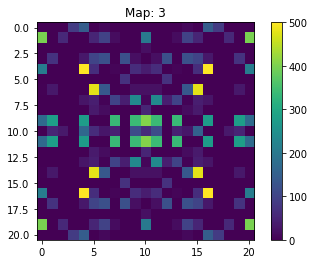

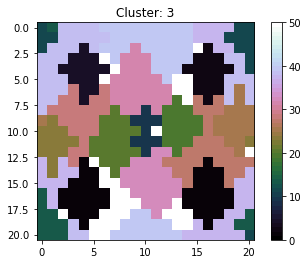

In [68]:
# Play as first position against random agent.
trainer = env.train([None, "random"])

observation = trainer.reset()
import importlib
import map_analysis
importlib.reload(map_analysis)
count = 0
#checks = [10, 75, 150, 300, 398]
#thresh = [80, 200, 250, 325, 325]
checks = [3]
#thresh = [200]
fignum = 1
while not env.done:
    my_action,b,c = map_analysis.agent(observation)
    #print("My Action", my_action)
    observation, reward, done, info = trainer.step(my_action)
    #print(reward)
    #print(done)
    #print(info)
    if(count in checks):
        """
        b[b < 0] = 0
        plt.figure(fignum)
        fignum+=1
        plt.title("Map: "+str(count))
        plt.imshow(b)
        plt.colorbar()
        plt.figure(fignum)
        fignum+=1
        plt.title("Blur: "+str(count))
        g = scipy.ndimage.filters.gaussian_filter(b,1.0)
        plt.imshow(g)
        plt.colorbar()
        plt.figure(fignum)
        fignum+=1
        plt.title("Blur with Threshold: "+str(count))
        print(checks.index(count))
        plt.imshow(g>thresh[checks.index(count)])
        
        plt.figure(fignum)
        fignum+=1
        plt.title("Map: "+str(count))
        plt.imshow(b)
        plt.colorbar()

        plt.figure(fignum)
        fignum+=1
        plt.title("Concat Map: "+str(count))
        plt.imshow(b_concat)
        plt.colorbar()

        plt.figure(fignum)
        fignum+=1
        plt.title("Wrapped Map: "+str(count))
        plt.imshow(b_wrap)
        plt.colorbar()
        """
        plt.figure(fignum)
        fignum+=1
        plt.title("Map: "+str(count))
        plt.imshow(b)
        plt.colorbar()


        plt.figure(fignum)
        fignum+=1
        plt.title("Cluster: "+str(count))
        plt.imshow(c,cmap=plt.cm.get_cmap('cubehelix', 50))
        plt.colorbar()
        plt.clim(0, 50)
        #plt.colorbar()
        #print(d)
        #print(c)
        
    count+=1
#env.render(mode="ipython", width=100, height=90)
#env.render(mode="ipython", width=800, height=600)

# Evaluate your Agent

In [ ]:
def mean_reward(rewards):
    wins = 0
    ties = 0
    loses = 0
    for r in rewards:
        r0 = 0 if r[0] is None else r[0]
        r1 = 0 if r[1] is None else r[1]
        if r0 > r1:
            wins += 1
        elif r1 > r0:
            loses += 1
        else:
            ties += 1
    return f'wins={wins/len(rewards)}, ties={ties/len(rewards)}, loses={loses/len(rewards)}'

# Run multiple episodes to estimate its performance.
# Setup agentExec as LOCAL to run in memory (runs faster) without process isolation.
print("My Agent vs Random Agent:", mean_reward(evaluate(
    "halite",
    ["/kaggle/working/"+agent_file, "random"],
    num_episodes=10, configuration={"agentExec": "LOCAL"}
)))

# Submit to Competition

1. Commit this kernel.
2. View the commited version.
3. Go to "Data" section and find submission.py file.
4. Click "Submit to Competition"
5. Go to [My Submissions](https://kaggle.com/c/halite/submissions) to view your score and episodes being played.